<a href="https://colab.research.google.com/github/nuoliu/HCA_Thailand_2024_workshop/blob/main/notebooks/Differential_abundance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

**Only run this setup section on google colab, do not run this code if you use this notebook in a different environment.**

In [ ]:
## https://stackoverflow.com/questions/70025153/how-to-access-the-shell-in-google-colab-when-running-the-r-kernel
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

loadPackages = function(pkgs){
  myrequire = function(...){
    suppressWarnings(suppressMessages(suppressPackageStartupMessages(require(...))))
  }
  ok = sapply(pkgs, require, character.only=TRUE, quietly=TRUE)
  if (!all(ok)){
    message("There are missing packages: ", paste(pkgs[!ok], collapse=", "))
  }
}

## Setup R2U
download.file("https://github.com/eddelbuettel/r2u/raw/master/inst/scripts/add_cranapt_jammy.sh",
              "add_cranapt_jammy.sh")
Sys.chmod("add_cranapt_jammy.sh", "0755")
shell_call("./add_cranapt_jammy.sh")
bspm::enable()
options(bspm.version.check=FALSE)
shell_call("rm add_cranapt_jammy.sh")

45 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading state information...
ca-certificates is already the newest version (20230311ubuntu0.22.04.1).
gnupg is already the newest version (2.2.27-3ubuntu2.1).
gnupg set to manually installed.
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
-----BEGIN PGP PUBLIC KEY BLOCK-----

mQINBFM+sY8BEADA70T+U0/2WNjOTLvytuXLvBC4vgA8hYvOaBS1cL3d8lu4mwr4
W84/6p4v/mXle/0eIO2D2g+XfK72ZHZxpS+bb7yPxrkCDLGxwUd/khtTJHSbbKFo
J73AsABflMe+8qv+E74+QTiXErTCNioFRz18sa0EvOnEAiokau6TZVYY2z9YjBNI
yEjTi+z+g8c1RL6VmrFEpTicTpafOLbkRyw0VKnAKG7Ytp3Ksc1G9/IAoKw3Q9La
0DJb5iX6hyB7+PNid6htK4LtPKZ2dNSrnRvNNkjj5BgcM2AT1hmxbzHNzIVmPoKA
CQFrkdjog3/PcyjdtZG7cfoSDXrbIAZeAa2ngLv9C/DJatVDd6maPOe66gLo7+As
ErMvO9vtiouqLdurW+Lhx0jFW9Ca3g1taLfbSDyS3X1mOGWcisbQvBqkIuoDQTeS
V4Z04wrwTZ1HtweKG/s5fmPtZNGWVI5YNRLIwdmbGzFTMPu2XTAOd+xSK2H+46Kh
Sh4kFeP

Tracing function "install.packages" in package "utils"



In [ ]:
## Install the R packages

cranPkgs2Install = c("BiocManager","devtools","patchwork")
install.packages(cranPkgs2Install, ask=FALSE, update=TRUE, quietly=TRUE)
system("sudo apt install libgsl-dev")
install.packages('Seurat')
BiocManager::install("scater")
BiocManager::install("SingleCellExperiment")
devtools::install_github("MarioniLab/miloR")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Installing package(s) 'BiocVersion', 'scater'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'SingleCellExperiment'”



RCurl        (NA -> 1.98-1.16 ) [CRAN]
tweenr       (NA -> 2.0.3     ) [CRAN]
statmod      (NA -> 1.5.0     ) [CRAN]
graphlayouts (NA -> 1.1.1     ) [CRAN]
tidygraph    (NA -> 1.3.1     ) [CRAN]
ggforce      (NA -> 0.4.2     ) [CRAN]
locfit       (NA -> 1.5-9.10  ) [CRAN]
limma        (NA -> 3.58.1    ) [CRAN]
numDeriv     (NA -> 2016.8-1.1) [CRAN]
ggraph       (NA -> 2.2.1     ) [CRAN]
edgeR        (NA -> 4.0.16    ) [CRAN]


Skipping 20 packages ahead of CRAN: zlibbioc, XVector, SparseArray, S4Arrays, IRanges, S4Vectors, MatrixGenerics, BiocGenerics, GenomeInfoDbData, GenomeInfoDb, DelayedArray, Biobase, GenomicRanges, beachmat, ScaledMatrix, BiocParallel, SummarizedExperiment, BiocSingular, SingleCellExperiment, BiocNeighbors

Installing 11 packages: RCurl, tweenr, statmod, graphlayouts, tidygraph, ggforce, locfit, limma, numDeriv, ggraph, edgeR



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpvSDKSE/remotes7ff1709f7/MarioniLab-miloR-f8cc3d6/DESCRIPTION’ ... OK
* preparing ‘miloR’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘miloR_2.0.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
## To simplify package loading, we created the loadPackages()
## function. But, if you don't have the function, you should
## use 'library(name_of_package)'
loadPackages = function(pkgs){
  myrequire = function(...){
    suppressWarnings(suppressMessages(suppressPackageStartupMessages(require(...))))
  }
  ok = sapply(pkgs, require, character.only=TRUE, quietly=TRUE)
  if (!all(ok)){
    message("There are missing packages: ", paste(pkgs[!ok], collapse=", "))
  }
}

pkgs = c( "miloR", "SingleCellExperiment", "scater", "dplyr","patchwork")
loadPackages(pkgs)


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, rowTabulates, rowVarDiffs, rowVars,
    rowWeightedMads, rowWeightedMeans, rowWeigh

download sample dataset

In [ ]:
shell_call("wget -q --output-document  milo_embryo_data.rds https://www.dropbox.com/scl/fi/rlgrtonyw58mc7pcvarrz/milo_embryo_data.rds?rlkey=cramsd7hnziihjuz2u4ejbg8v&dl=0")

This tutorial was modified based on the vignette from: https://marionilab.github.io/miloR/articles/milo_gastrulation.html

# Load data
For this vignette we will use the mouse gastrulation single-cell data from [Pijuan-Sala *et al.* 2019](https://www.nature.com/articles/s41586-019-0933-9). The dataset can be downloaded as a `SingleCellExperiment` object from the `MouseGastrulationData` package on Bioconductor. To make computations faster, here we will download just a subset of samples, 4 samples at stage E7 and 4 samples at stage E7.5.

This dataset has already been pre-processed and contains a `pca.corrected `dimensionality reduction, which was built after batch correction.

In [ ]:
embryo_data <- readRDS('milo_embryo_data.rds')

In [ ]:
embryo_data

class: SingleCellExperiment 
dim: 29452 14679 
metadata(0):
assays(1): counts
rownames(29452): ENSMUSG00000051951 ENSMUSG00000089699 ...
  ENSMUSG00000096730 ENSMUSG00000095742
rowData names(2): ENSEMBL SYMBOL
colnames(14679): cell_361 cell_362 ... cell_107079 cell_107080
colData names(17): cell barcode ... colour sizeFactor
reducedDimNames(2): pca.corrected umap
mainExpName: NULL
altExpNames(0):

# Visualize the data
We recompute PCA and UMAP embedding for this subset of cells to visualize the data.

In [ ]:
set.seed(1)

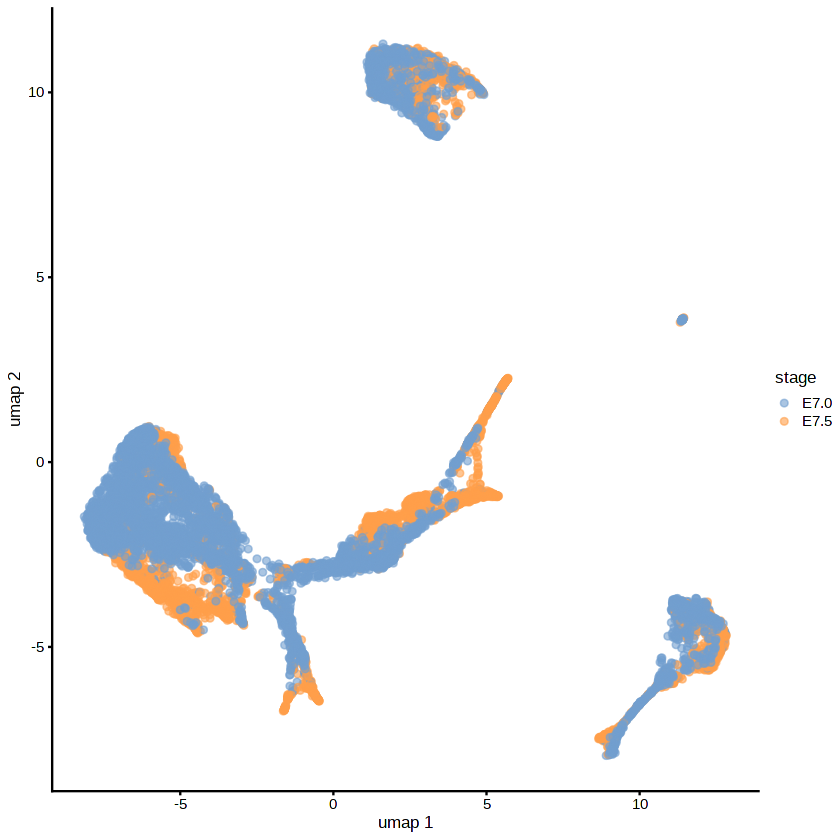

In [ ]:
embryo_data <- embryo_data[,apply(reducedDim(embryo_data, "pca.corrected"), 1, function(x) !all(is.na(x)))]
embryo_data <- runUMAP(embryo_data, dimred = "pca.corrected", name = 'umap')

plotReducedDim(embryo_data, colour_by="stage", dimred = "umap")

We will test for significant differences in abundance of cells between these stages of development, and the associated gene signatures.

# Differential abundance testing
## Create a Milo object
For differential abundance analysis on graph neighbourhoods we first construct a Milo object. This extends the SingleCellExperiment class to store information about neighbourhoods on the KNN graph.

In [ ]:
embryo_milo <- Milo(embryo_data)
embryo_milo

class: Milo 
dim: 29452 13002 
metadata(0):
assays(1): counts
rownames(29452): ENSMUSG00000051951 ENSMUSG00000089699 ...
  ENSMUSG00000096730 ENSMUSG00000095742
rowData names(2): ENSEMBL SYMBOL
colnames(13002): cell_361 cell_362 ... cell_107079 cell_107080
colData names(17): cell barcode ... colour sizeFactor
reducedDimNames(2): pca.corrected umap
mainExpName: NULL
altExpNames(0):
nhoods dimensions(2): 1 1
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(0):
nhoodIndex names(1): 0
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(0):
nhoodAdjacency dimension(2): 1 1

# Construct KNN graph
We need to add the KNN `graph` to the Milo object. This is stored in the `graph` slot, in `igraph` format. The miloR package includes functionality to build and store the graph from the PCA dimensions stored in the `reducedDim` slot. In this case, we specify that we want to build the graph from the MNN corrected PCA dimensions.

In [ ]:
embryo_milo <- buildGraph(embryo_milo, k = 30, d = 30, reduced.dim = "pca.corrected")

Constructing kNN graph with k:30



Alternatively, one can add a precomputed KNN graph (for example constructed with Seurat or scanpy) to the graph slot using the adjacency matrix, through the helper function `buildFromAdjacency`.



# Defining representative neighbourhoods on the KNN graph
We define the neighbourhood of a cell, the index, as the group of cells connected by an edge in the KNN graph to the index cell. For efficiency, we don’t test for DA in the neighbourhood of every cell, but we sample as indices a subset of representative cells, using a KNN sampling algorithm used by [Gut et al. 2015](https://www.nature.com/articles/nmeth.3545).

For sampling you need to define a few parameters:

* `prop`: the proportion of cells to randomly sample to start with (usually 0.1 - 0.2 is sufficient)
* k: the k to use for KNN refinement (we recommend using the same k used for KNN graph building)
* d: the number of reduced dimensions to use for KNN refinement (we recommend using the same d used for KNN graph building)
* `refined`: indicates whether you want to use the sampling refinement algorith, or just pick cells at random. The default and recommended way to go is to use refinement. The only situation in which you might consider using random instead, is if you have batch corrected your data with a graph based correction algorithm, such as BBKNN, but the results of DA testing will be suboptimal.

In [ ]:
embryo_milo <- makeNhoods(embryo_milo, prop = 0.1, k = 30, d=30, refined = TRUE, reduced_dims = "pca.corrected")

Checking valid object

Running refined sampling with reduced_dim



Once we have defined neighbourhoods, it’s good to take a look at how big the neighbourhoods are (i.e. how many cells form each neighbourhood). This affects the power of DA testing. We can check this out using the `plotNhoodSizeHist` function. Empirically, we found it’s best to have a distribution peaking above 20. Otherwise you might consider rerunning `makeNhoods` increasing k and/or `prop`.



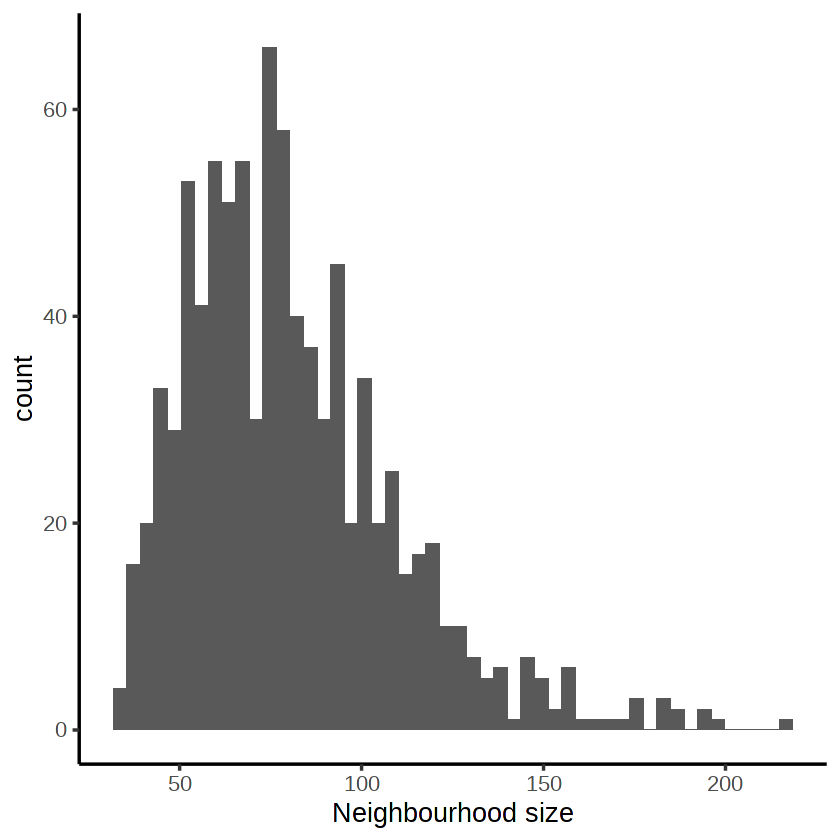

In [ ]:
plotNhoodSizeHist(embryo_milo)

# Counting cells in neighbourhoods
Milo leverages the variation in cell numbers between replicates for the same experimental condition to test for differential abundance. Therefore we have to count how many cells from each sample are in each neighbourhood. We need to use the cell metadata and specify which column contains the sample information.

In [ ]:
embryo_milo <- countCells(embryo_milo, meta.data = data.frame(colData(embryo_milo)), sample="sample")

Checking meta.data validity

Counting cells in neighbourhoods



This adds to the Milo object a 𝑛×𝑚
 matrix, where 𝑛
 is the number of neighbourhoods and 𝑚
 is the number of experimental samples. Values indicate the number of cells from each sample counted in a neighbourhood. This count matrix will be used for DA testing.

In [ ]:
head(nhoodCounts(embryo_milo))

6 x 8 sparse Matrix of class "dgCMatrix"
  2 3  6 15 10 14 20 30
1 . 1 12 14 53  8  3 29
2 2 3 51 20 56  8 13 42
3 1 .  8 21  3 20  6  8
4 . .  1  5 19  3  . 30
5 . 2 17  2 36  2  3 23
6 . 1  2 11 32 14  3 25

# Defining experimental design
Now we are all set to test for differential abundance in neighbourhoods. We implement this hypothesis testing in a **generalized linear model (GLM)** framework, specifically using the Negative Binomial GLM implementation in `edgeR`.

We first need to think about our experimental design. The design matrix should match each sample to the experimental condition of interest for DA testing. In this case, we want to detect DA between embryonic stages, stored in the `stage` column of the dataset `colData`. We also include the `sequencing.batch` column in the design matrix. This represents a known technical covariate that we want to account for in DA testing.



In [ ]:
embryo_design <- data.frame(colData(embryo_milo))[,c("sample", "stage", "sequencing.batch")]
## Convert batch info from integer to factor
embryo_design$sequencing.batch <- as.factor(embryo_design$sequencing.batch)
embryo_design <- distinct(embryo_design)
rownames(embryo_design) <- embryo_design$sample

embryo_design

,sample,stage,sequencing.batch
,<int>,<chr>,<fct>
2,2,E7.5,1
3,3,E7.5,1
6,6,E7.5,1
15,15,E7.0,2
10,10,E7.0,1
14,14,E7.0,2
20,20,E7.5,2
30,30,E7.0,3


# Computing neighbourhood connectivity
Milo uses an adaptation of the Spatial FDR correction introduced by [cydar](https://bioconductor.org/packages/release/bioc/html/cydar.html), which accounts for the overlap between neighbourhoods. Specifically, each hypothesis test P-value is weighted by the reciprocal of the kth nearest neighbour distance. To use this statistic we first need to store the distances between nearest neighbors in the Milo object. This is done by the `calcNhoodDistance` function (N.B. this step is the most time consuming of the analysis workflow and might take a couple of minutes for large datasets).

In [ ]:
embryo_milo <- calcNhoodDistance(embryo_milo, d=30, reduced.dim = "pca.corrected")

'as(<dgTMatrix>, "dgCMatrix")' is deprecated.
Use 'as(., "CsparseMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").



In [ ]:
embryo_milo

class: Milo 
dim: 29452 13002 
metadata(0):
assays(1): counts
rownames(29452): ENSMUSG00000051951 ENSMUSG00000089699 ...
  ENSMUSG00000096730 ENSMUSG00000095742
rowData names(2): ENSEMBL SYMBOL
colnames(13002): cell_361 cell_362 ... cell_107079 cell_107080
colData names(17): cell barcode ... colour sizeFactor
reducedDimNames(2): pca.corrected umap
mainExpName: NULL
altExpNames(0):
nhoods dimensions(2): 13002 887
nhoodCounts dimensions(2): 887 8
nhoodDistances dimension(1): 887
graph names(1): graph
nhoodIndex names(1): 887
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(0):
nhoodAdjacency dimension(2): 1 1

# Testing
Now we can do the DA test, explicitly defining our experimental design. In this case, we want to dest for differences between experimental stages, while accounting for the variability between technical batches (You can find more info on how to use formulas to define a testing design in R [here](https://r4ds.had.co.nz/model-basics.html#formulas-and-model-families))

In [ ]:
da_results <- testNhoods(embryo_milo, design = ~ sequencing.batch + stage, design.df = embryo_design, reduced.dim = 'pca.corrected')

Using TMM normalisation

Performing spatial FDR correction with k-distance weighting



This calculates a Fold-change and corrected P-value for each neighbourhood, which indicates wheather there is significant differential abundance between developmental stages.

In [ ]:
da_results %>%
  arrange(SpatialFDR) %>%
  head()

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
92,-8.507646,11.40146,65.41631,8.241906e-16,7.310571e-13,92,5.711546e-13
95,-6.632734,11.55538,58.63986,2.425831e-14,5.882387e-12,95,4.712334e-12
162,-7.251402,11.84384,59.66523,1.453016e-14,5.882387e-12,162,4.712334e-12
404,-8.190442,11.25128,58.46105,2.652711e-14,5.882387e-12,404,4.712334e-12
266,-6.161027,11.33138,55.75496,1.027537e-13,1.822851e-11,266,1.439855e-11
63,-8.008068,11.05680,54.00338,2.471421e-13,3.653585e-11,63,2.940653e-11


# Inspecting DA testing results
We can start inspecting the results of our DA analysis from a couple of standard diagnostic plots. We first inspect the distribution of *uncorrected* P values, to verify that the test was balanced.

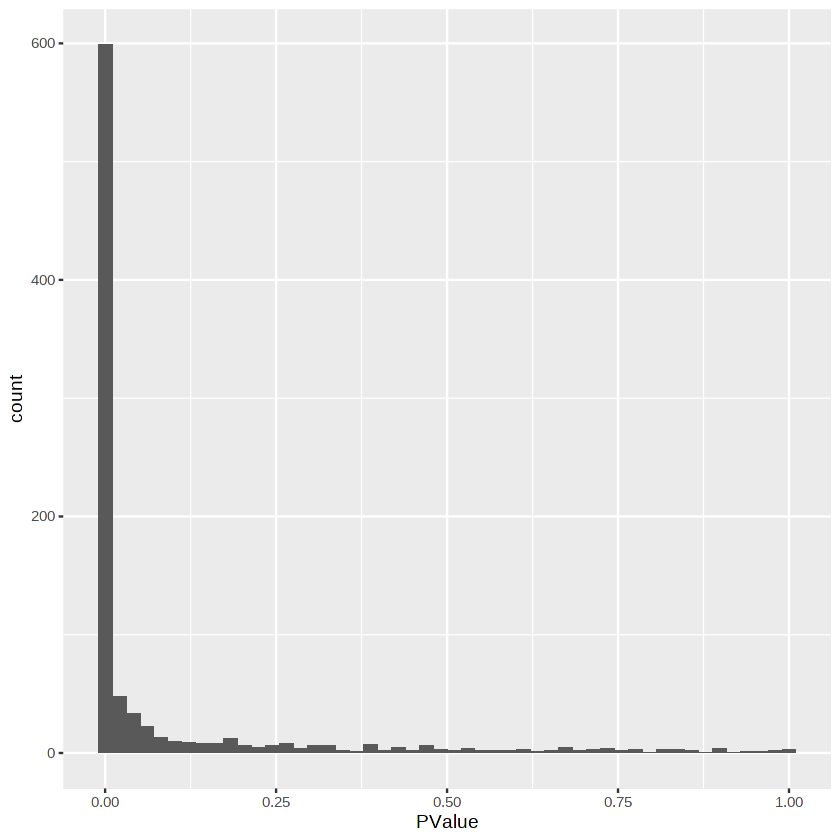

In [ ]:
ggplot(da_results, aes(PValue)) + geom_histogram(bins=50)

Then we visualize the test results with a volcano plot (remember that each point here represents **a neighbourhood, not a cell**).

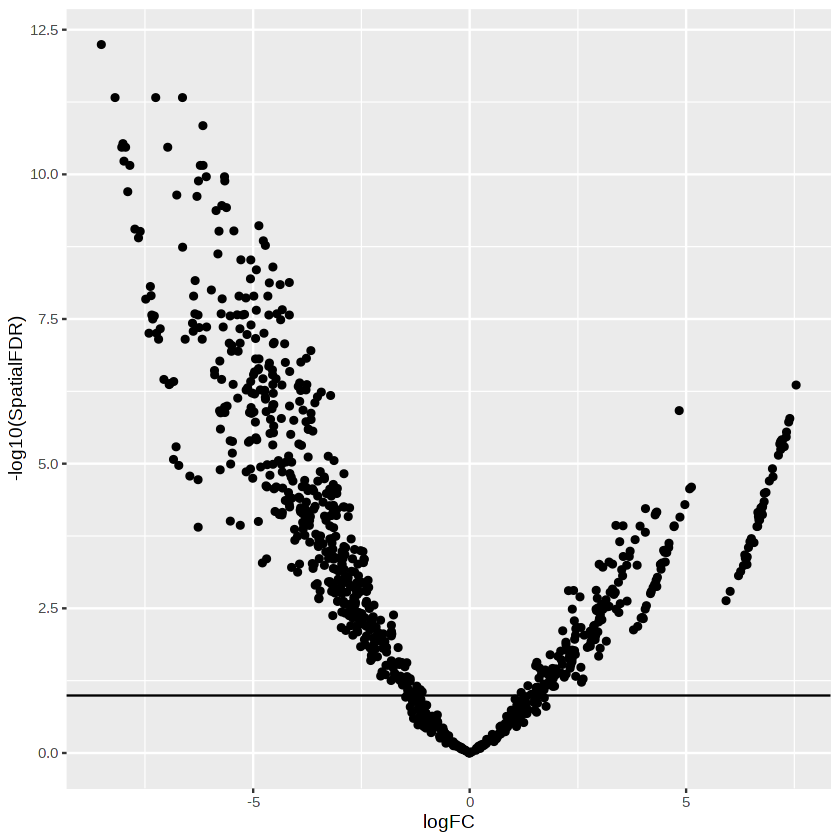

In [ ]:
ggplot(da_results, aes(logFC, -log10(SpatialFDR))) +
  geom_point() +
  geom_hline(yintercept = 1) ## Mark significance threshold (10% FDR)

Looks like we have detected several neighbourhoods were there is a significant difference in cell abundances between developmental stages.

To visualize DA results relating them to the embedding of single cells, we can build an abstracted graph of neighbourhoods that we can superimpose on the single-cell embedding. Here each node represents a neighbourhood, while edges indicate how many cells two neighbourhoods have in common. Here the layout of nodes is determined by the position of the index cell in the UMAP embedding of all single-cells. The neighbourhoods displaying singificant DA are colored by their log-Fold Change.

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6)

In [ ]:
embryo_milo <- buildNhoodGraph(embryo_milo)

In [ ]:
## Plot single-cell UMAP
umap_pl <- plotReducedDim(embryo_milo, dimred = "umap", colour_by="celltype", text_by = "celltype", text_size = 3) +
  guides(fill="none")

Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


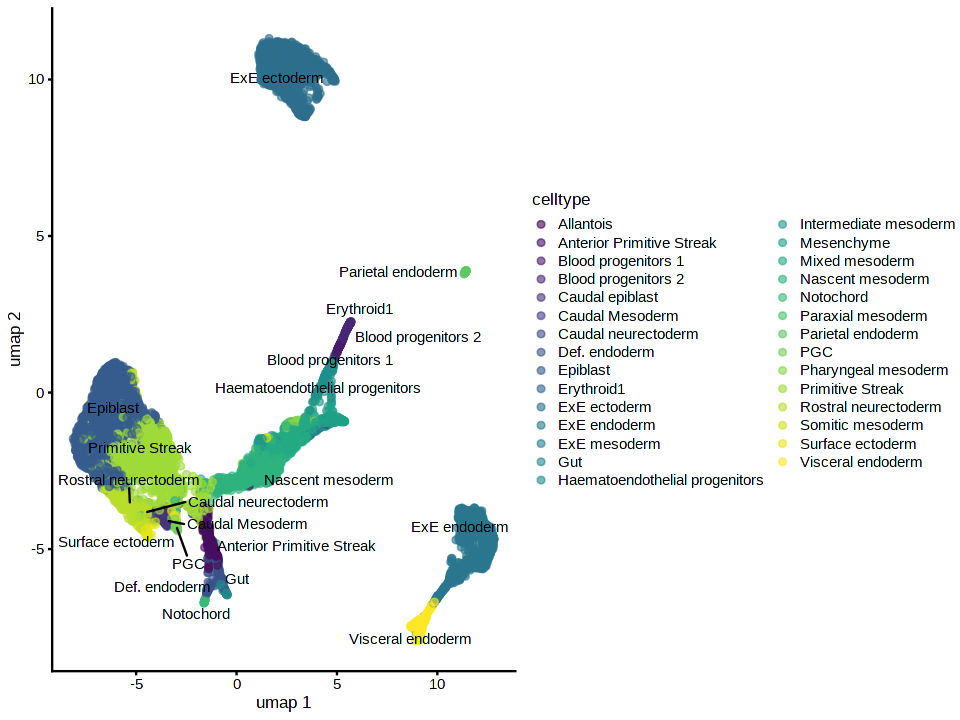

In [ ]:
umap_pl

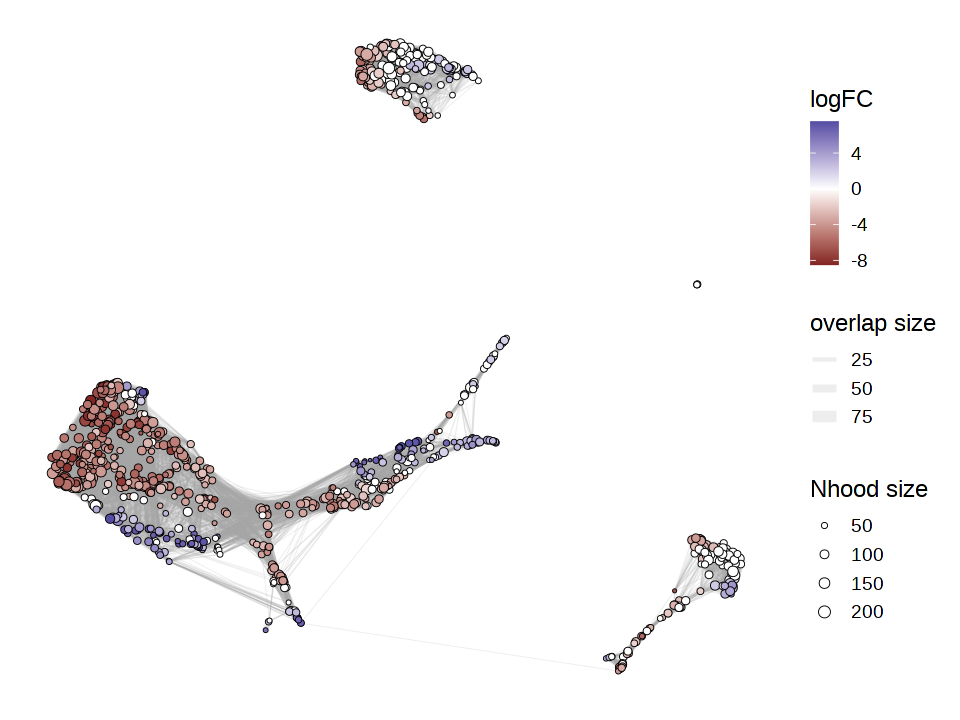

In [ ]:

## Plot neighbourhood graph
nh_graph_pl <- plotNhoodGraphDA(embryo_milo, da_results, layout="umap",alpha=0.05)
nh_graph_pl

We might also be interested in visualizing wheather DA is particularly evident in certain cell types. To do this, we assign a cell type label to each neighbourhood by finding the most abundant cell type within cells in each neighbourhood. We can label neighbourhoods in the results `data.frame` using the function `annotateNhoods`. This also saves the fraction of cells harbouring the label.



In [ ]:
da_results <- annotateNhoods(embryo_milo, da_results, coldata_col = "celltype")
head(da_results)

Converting celltype to factor...



,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR,celltype,celltype_fraction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,-3.574802,11.09123,27.471282,1.687471e-07,1.039435e-06,1,8.888778e-07,ExE ectoderm,1.0000000
2,-1.758071,11.59068,9.169898,2.477985e-03,4.194604e-03,2,4.119817e-03,ExE ectoderm,1.0000000
3,-1.944008,10.70912,4.559094,3.281269e-02,4.450284e-02,3,4.426589e-02,Epiblast,0.5373134
4,-5.478387,10.17960,24.033209,9.893171e-07,4.667682e-06,4,4.131777e-06,Primitive Streak,0.9655172
5,-2.129669,10.49987,7.633133,5.760108e-03,8.963536e-03,5,8.864117e-03,Visceral endoderm,0.8117647
6,-4.160334,10.83770,27.184046,1.955485e-07,1.179942e-06,6,1.009818e-06,Primitive Streak,0.9886364


While neighbourhoods tend to be homogeneous, we can define a threshold for celltype_fraction to exclude neighbourhoods that are a mix of cell types.



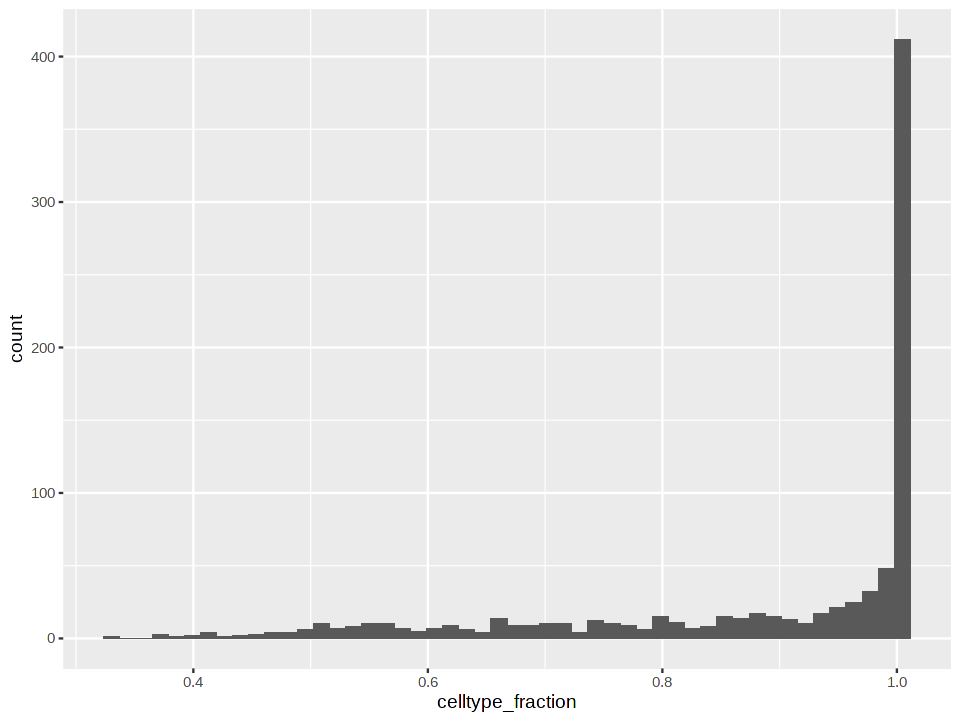

In [ ]:
ggplot(da_results, aes(celltype_fraction)) + geom_histogram(bins=50)

In [ ]:
da_results$celltype <- ifelse(da_results$celltype_fraction < 0.7, "Mixed", da_results$celltype)

visualize the distribution of DA Fold Changes in different cell types

Converting group_by to factor...



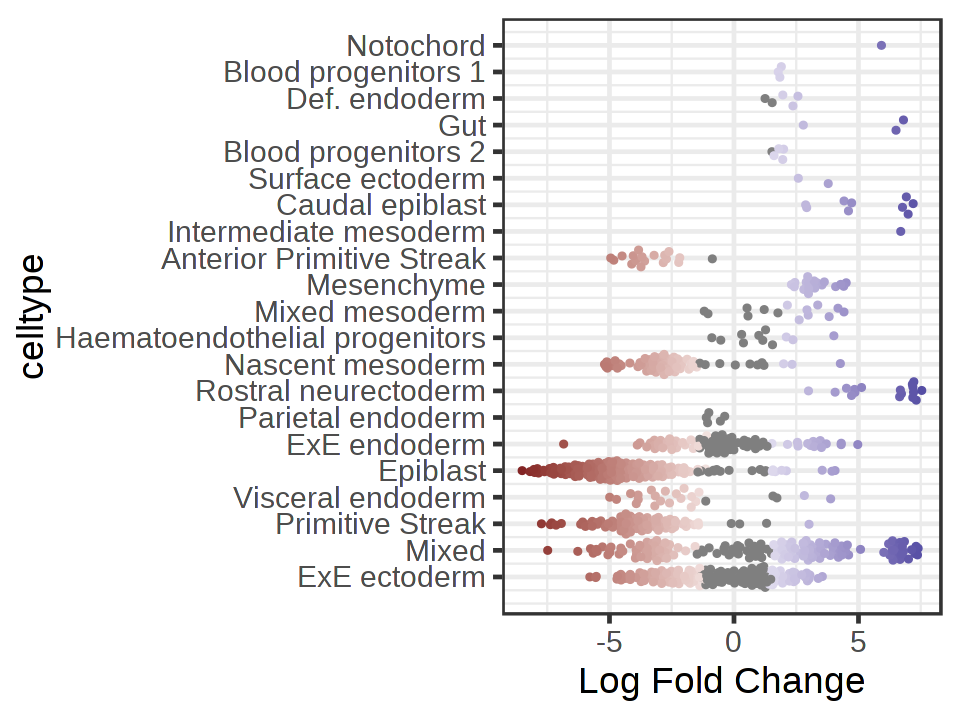

In [ ]:
plotDAbeeswarm(da_results, group.by = "celltype")

This is already quite informative: we can see that certain early development cell types, such as epiblast and primitive streak, are enriched in the earliest time stage, while others are enriched later in development, such as ectoderm cells. Interestingly, we also see plenty of DA neighbourhood with a mixed label. This could indicate that transitional states show changes in abundance in time.



# Identifying signatures of DA subpopulations
Once we have identified neighbourhoods with significant DA, we might be interested in learning more about the gene expression signatures that define these subpopulations. Here the analyst might get creative, depending on the specific characteristics of their dataset and the biological question of interest. In the `miloR` package, we provide functionality to explore neighbourhood markers through the function `findNhoodMarkers`. This groups significantly DA neighbourhoods that show concordant Fold-Change and performs a test for differential expression between cells in those neighbourhoods.

In practice, it might be convenient to subset a selected number of neighbourhoods of interest for gene-level downstream analysis. For the sake of demonstration, here we focus on identifying signatures of DA subpopulations in the endoderm development lineage.

In [ ]:
logcounts(embryo_milo) <- log1p(counts(embryo_milo))
dge_smp <- findNhoodMarkers(embryo_milo, da_results,
                                     assay = "counts", gene.offset = FALSE, da.fdr = 0.1,
                                     aggregate.samples = TRUE, sample_col = "sample",
                                     subset.nhoods = da_results$celltype %in% c("Anterior Primitive Streak", "Def. endoderm", "Gut", "Visceral endoderm")
                                     )

head(dge_smp)

Warning message in findNhoodMarkers(embryo_milo, da_results, assay = "counts", gene.offset = FALSE, :
“This method will be deprecated soon. Please use groupNhoods and findNhoodMarkers”
Found 707 DA neighbourhoods at FDR 10%

nhoodAdjacency found - using for nhood grouping

Nhoods aggregated into 3 groups



,logFC_1,adj.P.Val_1,logFC_2,adj.P.Val_2,logFC_3,adj.P.Val_3,GeneID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSMUSG00000051951,0.00000000,1,0.0000000,1,0.00000000,1,ENSMUSG00000051951
ENSMUSG00000089699,0.00000000,1,0.0000000,1,0.00000000,1,ENSMUSG00000089699
ENSMUSG00000102343,0.00000000,1,0.0000000,1,0.00000000,1,ENSMUSG00000102343
ENSMUSG00000025900,0.00000000,1,0.0000000,1,0.00000000,1,ENSMUSG00000025900
ENSMUSG00000025902,0.06078229,1,-0.1839686,1,0.09047249,1,ENSMUSG00000025902
ENSMUSG00000104328,0.00000000,1,0.0000000,1,0.00000000,1,ENSMUSG00000104328


This identifies n marker genes at FDR 10% that distinguish two main groups within the epiblast neighbourhoods, one significantly depleted in the early stage and one significantly enriched. We can visualize expression of the detected marker genes using the function `plotNhoodExpressionDA`. This shows the average expression in each neighbourhood, ranked by log-Fold Change in the DA test. Note that the gene x nhood expression matrix can be pre-computed and stored using the `calcNhoodExpression` function, to avoid repeating the computation every time you need to plot.

In this case we mainly identified negative markers of the epiblast neighbourhoods enriched with age.

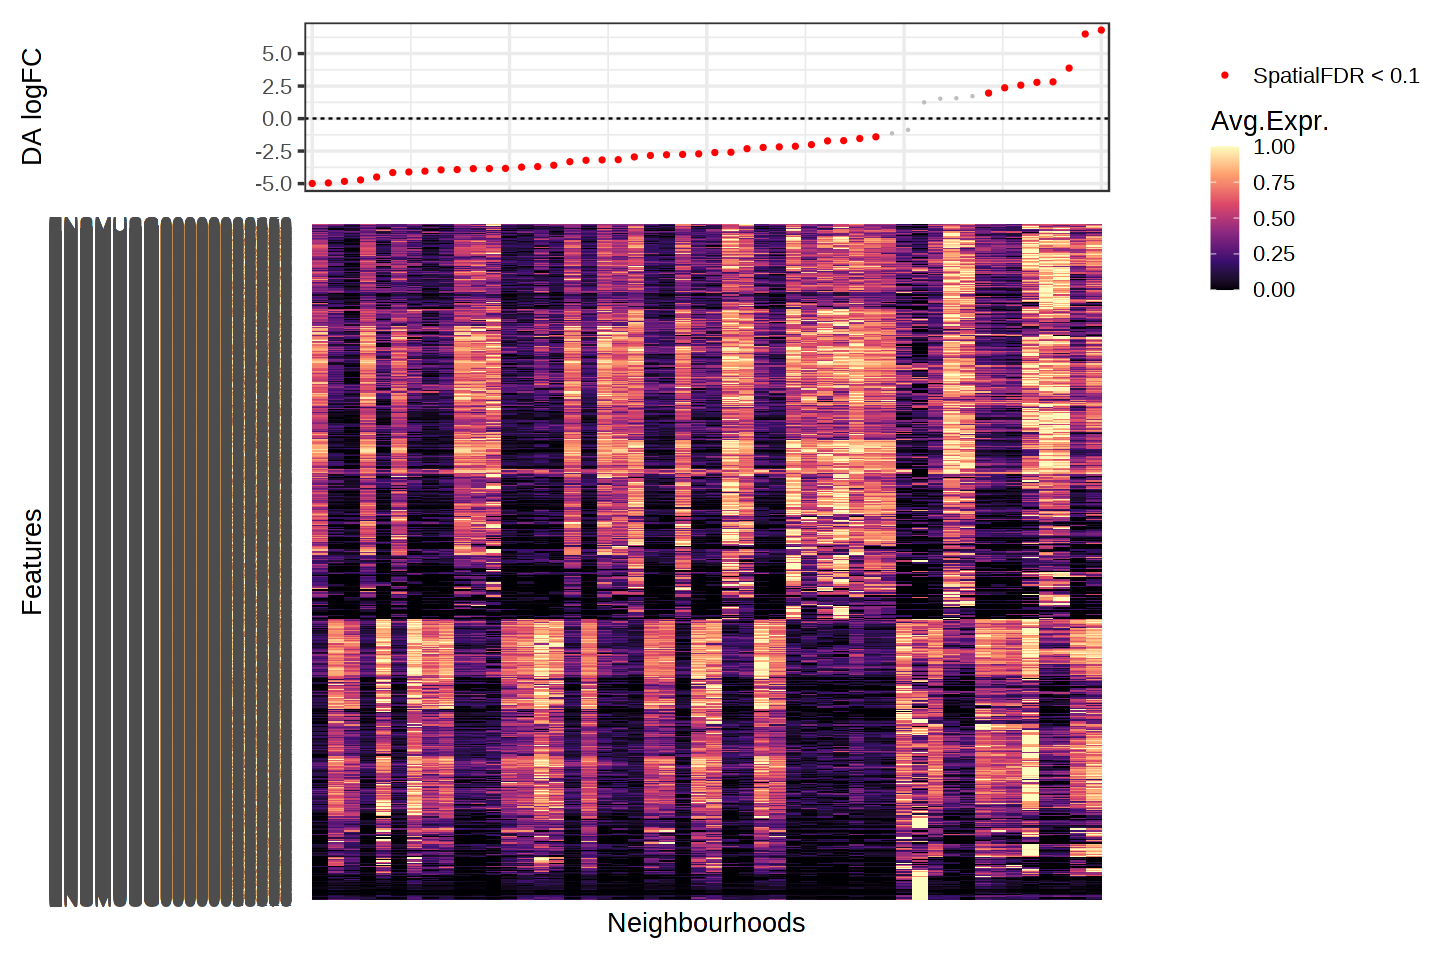

In [ ]:
markers <- dge_smp[which(dge_smp$adj.P.Val_1 < 0.1 ), "GeneID"]
logcounts(embryo_milo) <- log1p(counts(embryo_milo))
embryo_milo <- calcNhoodExpression(embryo_milo, subset.row=markers)
options(repr.plot.width = 12, repr.plot.height = 8)
plotNhoodExpressionDA(embryo_milo, da_results, features = markers,
                      subset.nhoods = da_results$celltype %in% c("Anterior Primitive Streak", "Def. endoderm", "Gut", "Visceral endoderm"),
                      assay="logcounts",
                      scale_to_1 = TRUE, cluster_features = TRUE
                      )

# Session information

In [ ]:
print(sessionInfo())

R version 4.4.1 (2024-06-14)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] patchwork_1.2.0             dplyr_1.1.4                
 [3] scater_1.32.0               ggplot2_3.5.1              
 [5] scuttle_1.14.0              SingleCell